# Representation of Data for Machine Learning using `Scikit-learn`

If `scikit-learn` is not installed in your system, you can install it with the following command

In [ ]:
!pip install sklearn

When using [scikit-learn](http://scikit-learn.org), it is important to have a handle on how data is represented.

## Representation of Data in Scikit-learn

Machine learning is about creating models from data: for that reason, we'll start by discussing how data can be represented in order to be understood by the computer.  We will also show some examples of how to visualize data.

Most machine learning algorithms implemented in scikit-learn (and other machine learning libraries) expect data to be stored as a **two-dimensional array or matrix** $X$.  The arrays can be either ``numpy`` arrays, or in some cases ``scipy.sparse`` matrices. The size of the array is expected to be `[n_samples, n_features]`. You can think of each row in such 2-D array as  representing an instance of the data and each column as representing a feature of the data.

- **n_samples:**   The number of samples (rows in $X$): each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in a database, a line in a CSV file, or whatever you can describe with a fixed set of quantitative traits.

- **n_features:**  The number of features (columns in $X$) or distinct traits that can be used to describe each item in a quantitative manner.  Features are generally real-valued ($x_n \in \mathbb{R}$), but may be boolean or discrete-valued in some cases.

The number of features in $X$ must be fixed in advance. However that number can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. (Advanced note: This is a case where `scipy.sparse` matrices can be useful, in that they are much more memory-efficient than numpy arrays for sparse data).

To sum up, data in scikit-learn is represented as a **feature matrix** $X$ and a **label vector** of targets/classes $y$. 

$$
{\rm feature~matrix:~~~} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1D}\\
x_{21} & x_{22} & \cdots & x_{2D}\\
x_{31} & x_{32} & \cdots & x_{3D}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{ND}\\
\end{matrix}
\right]
\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:\:
{\rm label~vector:~~~} {\bf y}~=~ \left[
\begin{matrix}
y_1\\
y_2\\
y_3\\
\vdots\\
\vdots\\
y_N\\
\end{matrix}
\right]
$$

This feature matrix $X$ contains $N$ samples and $D$ features. $X$ is capitalized because it represents a matrix. $y$ is lowercase because it represents a vector.

#### Machine learning terminology

- Each row in $X$ is an observation (also known as: sample, example, instance, record)
- Each column in $X$ is a feature (also known as: predictor, attribute, independent variable, input, regressor, covariate)

## A Simple Example: the Iris Dataset

As an example of a simple dataset, we're going to take a look at the iris data set stored provided by default in scikit-learn. The data consists of 4 measurements (features) of three different species (classes) of irises, a flower type.

Let's start by displaying the sort of objects that we are going to be working with. I just want to display the pictures here in the notebook for you to get a tangible feeling of what sort of objects we will be working with, namely, flowers. In future practicals you will learn about creating a model that is able to predict the type of flower/class (Setosa, Versicolor, or Virginica), given a set of input features (width and length of petal and sepal).

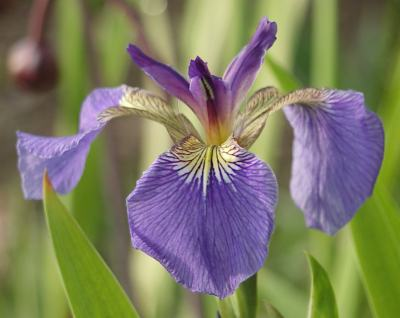

Iris Setosa



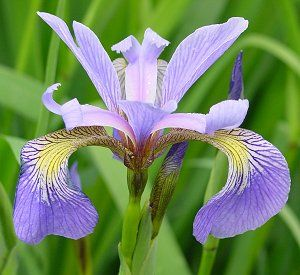

Iris Versicolor



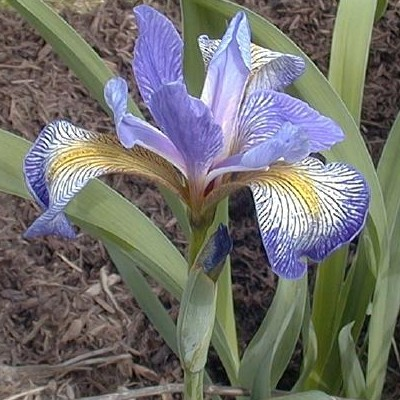

Iris Virginica


In [1]:
from IPython.core.display import Image, display
display(Image(filename='images/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='images/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='images/iris_virginica.jpg'))
print("Iris Virginica")

### Loading the Iris Data with Scikit-Learn

Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:
  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

![alt text](.\images\features.png "iris dataset features")


- Target classes to predict:
  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
![alt text](.\images\targets.png "iris dataset target names")  

scikit-learn embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

The Iris CSV file can be found in your Python folder (Your path to `\Anaconda3\Lib\site-packages\sklearn\datasets\data\iris.csv`). If you open it, the first 7 lines of the file will look like this:

    150	4	setosa	versicolor	virginica
    5.1	3.5	1.4	0.2	0 
    4.9	3	  1.4	0.2	0 
    4.7	3.2	1.3	0.2	0 
    4.6	3.1	1.5	0.2	0 
    5	  3.6	1.4	0.2	0 
    5.4	3.9	1.7	0.4	0 


The first line is a header file, specifying the number of instances/rows in the data set (150), the number of features/columns (4) and the target/labels names (setosa, versicolor, virginica). The 2nd line of the file is the 1st instance in the data set, the first 4 columns correspond to that instance values for sepal length, sepal width, petal length and petal width. The last column contains the target code 0, 1 or 2 corresponding to setosa, versicolor or virginica.


#### Let's begin!

Before we get started, you should fire up the Spyder IDE included in your Anaconda Python distribution. The functionality provided by Spyder will help you a lot throughout the tutorial. To get started, let's first load the Iris data. Type the following in your Python editor IDE:

In [17]:
from sklearn.datasets import load_iris
iris = load_iris()

The result is a ``Bunch()`` object, which is basically an enhanced dictionary containing the data. You can manually explore the iris Bunch object manually by clicking on the `Variable Explorer` tab in your Spyder IDE and the clicking on the listed `iris` object.

![alt text](.\images\spyderVariableExplorer.png "variable Explorer in Spyder")


**Note that bunch objects are not required for performing learning in scikit-learn, they are simply a convenient container for the numpy arrays containing the actual data that is required, namely $X$ and $y$**

Let's examine next the sort of attributes contained within the Iris object:

In [18]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Now let's take a look at the structure of the matrix $X$ containing the data instances with their corresponding features values:

In [19]:
n_samples, n_features = iris.data.shape
print (n_samples, n_features)

150 4


Now, let's print the 1st instance in the data (i.e. the first row in $X$):

In [20]:
print(iris.data[0])

[ 5.1  3.5  1.4  0.2]


### Easy Questions:

- How would you print the 2nd instance? 
- How would you print the last instance? 
- How would you print the last instance if you don't know the length of the data set?

### Moving on...

Let's turn our attention to the `target` vector $y$. 

In [21]:
print(iris.target.shape)

(150,)


Let's print the 1st instance in $X$ and the corresponding target $y$:

In [22]:
print(iris.data[0])
print(iris.target[0])

[ 5.1  3.5  1.4  0.2]
0


The numerical 0 value represents the class setosa, Since 0 is the position of the class setosa in the `target_names` arary: 

In [23]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


Let's print now the entire target/label vector $y$:

In [25]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Make sure you understand how the class names are associated with target values! i.e. What is the class name of a data instance with target value 0, 1 or 2?

You can also explore the data via the Spyder GUI. Double-click on the iris variable sitting in the "Variable Explorer" tab. 

![](.\images\variableExplorerInDepth.png)

The dataset `iris.data` is four dimensional (it contains 4 features), so we cannot simultaneously visualize all of them. But we can visualize two of the dimensions at a time using a simple scatter-plot:

**Note**: You don't need to include the line "%matplotlib inline" in your code if you are using Spyder. I need to do it here just for proper display in this python notebook. 

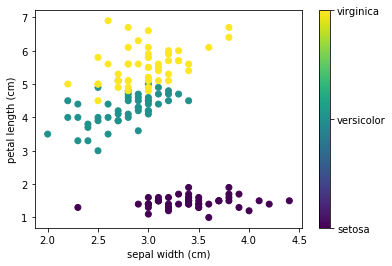

In [61]:
%matplotlib inline 
# You don't need to include the previous line in your IDE code
import numpy as np
import matplotlib.pyplot as plt

def plot_iris_projection(x_index, y_index):
    # this formatter will label the colorbar with the correct target names
    formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

    plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
                c=iris.target)
    plt.colorbar(ticks=[0, 1, 2], format=formatter)
    plt.xlabel(iris.feature_names[x_index])
    plt.ylabel(iris.feature_names[y_index])

x_index=1
y_index=2
plot_iris_projection(x_index,y_index)

### Quick Exercise:

Change `x_index` and `y_index` in the above script and try to estimate the best combination of just two features of the data set which better separates the three classes of irises.

## Other Available Data

Scikit offers several methods of using data sets for exploratory/learning purposes. They come in three flavors:

- **Packaged Data:** these small datasets are packaged with the scikit-learn installation,
  and can be downloaded using the tools in ``sklearn.datasets.load_*``. The Iris data set we have been working with, is an example of this sort of packaged data.
- **Downloadable Data:** these larger datasets are available for download, and scikit-learn
  includes tools which streamline this process.  These tools can be found in
  ``sklearn.datasets.fetch_*``
- **Generated Data:** there are several datasets which are generated from models based on a
  random seed.  These are available in the ``sklearn.datasets.make_*``

You can explore the available dataset loaders, fetchers, and generators using IPython's
tab-completion functionality.  After importing the ``datasets`` submodule from ``sklearn``,
type

    `datasets.load_` + TAB

or

    `datasets.fetch_` + TAB

or

    `datasets.make_` + TAB

to see a list of available functions. So, let's first import the datasets:

In [62]:
from sklearn import datasets

The data downloaded using the `fetch_` scripts are stored locally, within a subdirectory of your home directory. You can use the following code snippet to determine where it is located:

In [63]:
from sklearn.datasets import get_data_home
get_data_home()

'C:\\Users\\drozado\\scikit_learn_data'

## Loading Digits Data

Now we'll take a look at another dataset, one where we have to put a bit
more thought into how to represent the data.  We can explore the data in
a similar manner as above:

In [64]:
from sklearn.datasets import load_digits
digits = load_digits()

In [65]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [66]:
n_samples, n_features = digits.data.shape
print (n_samples, n_features)

1797 64


I hope it is clear to you that we are dealing with a feature matrix $X$ with 1797 rows and 64 columns.

In [67]:
print(digits.data[0])
print(digits.target)

[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]
[0 1 2 ..., 8 9 8]


The target ($y$) is just the digit represented by the data $X$.  The data is an array of
length 64... but what does this data mean?

There's a clue in the fact that we have two versions of the data array:
``data`` and ``images``.  Let's take a look at them:

In [68]:
print(digits.data.shape)
print(digits.images.shape)

(1797, 64)
(1797, 8, 8)


To sum up, `digits.images` represents the matrix representation of an image

![](./images/imageMatrix.png)

We see now what the features mean.  Each feature is a real-valued quantity representing the darkness of a pixel in an 8x8 image of a hand-written digit.


`digits.data` is simply a flattened (1 dimensional array) version of the same data

![](./images/flatten_img.png)

Let's visualize the data.  It's little bit more involved than the simple scatter-plot we used above, but we can do it rather tersely. Once again, don't worry about the details of the code. I just want to provide you with a tangible representation of the data.

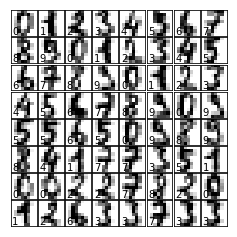

In [70]:
# set up the figure
import pylab as plt
fig = plt.figure(figsize=(3, 3))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Even though each sample has data that is inherently two-dimensional, the data matrix flattens this 2D data into a **single vector**, which can be contained in one **row** of the data matrix.

## Exploring scikit data structures in the Spyder IDE

Use the variable explorer tab in your Spyder IDE to explore the features of a data set in scikilearn. You can use the previous `iris` or `digits` dataset, or a different type of data set. Explore the name, the type, the size and the value of the data set.  Double-click on the item to explore the inner attributes of the data set through a GUI interface. This exercise will give you a much better understanding of the sort of data structures used for machine learning applications so dwell sometime on it.